In [1]:
import pandas as pd
import ydata_profiling

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
results = pd.read_csv(r"data/results.csv")
races = pd.read_csv(r"data/races.csv")
drivers = pd.read_csv(r"data/drivers.csv")
driver_standings = pd.read_csv(r"data/driver_standings.csv")
constructors = pd.read_csv(r"data/constructors.csv")
constructor_standings = pd.read_csv(r"data/constructor_standings.csv")
constructor_results = pd.read_csv(r"data/constructor_results.csv")
pit_stops = pd.read_csv(r"data/pit_stops.csv")
status = pd.read_csv(r"data/status.csv")
seasons = pd.read_csv(r"data/seasons.csv")

circuits = pd.read_csv(r"data/circuits.csv")
lap_times = pd.read_csv(r"data/lap_times.csv")
qualifying = pd.read_csv(r"data/qualifying.csv")
sprint_results = pd.read_csv(r"data/sprint_results.csv")

In [4]:
print('\nDrivers:')
print((drivers == "\\N").sum())
print('\nRaces:')
print((races == "\\N").sum())
print('\nResults:')
print((results == "\\N").sum())
print('\nConstructor_results:')
print((constructor_results == "\\N").sum())
print('\nQualifying:')
print((qualifying == "\\N").sum())
print('\nSprint_results:')
print((sprint_results == "\\N").sum())

# W pozostałych zbiorach nie ma pustych wartości:
# print((circuits == "\\N").sum())
# print((constructor_standings == "\\N").sum())
# print((constructors == "\\N").sum())
# print((driver_standings == "\\N").sum())
# print((lap_times == "\\N").sum())
# print((pit_stops == "\\N").sum())
# print((seasons == "\\N").sum())
# print((status == "\\N").sum())


Drivers:
driverId         0
driverRef        0
number         802
code           757
forename         0
surname          0
dob              0
nationality      0
url              0
dtype: int64

Races:
raceId            0
year              0
round             0
circuitId         0
name              0
date              0
time            731
url               0
fp1_date       1035
fp1_time       1057
fp2_date       1035
fp2_time       1057
fp3_date       1053
fp3_time       1072
quali_date     1035
quali_time     1057
sprint_date    1107
sprint_time    1110
dtype: int64

Results:
resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10916
positionText           0
positionOrder          0
points                 0
laps                   0
time               18931
milliseconds       18931
fastestLap         18478
rank               18249
fastestLapTime     18478
fastestLapSpeed

In [5]:
# Stworzenie zmiennej z punktami/rankingiem teamu przed danym wyścigiem

constructor_standings = constructor_standings.sort_values(by='raceId')
constructor_standings['points_before'] = constructor_standings.groupby('constructorId')['points'].shift(1)
constructor_standings['ranking_before'] = constructor_standings.groupby('constructorId')['position'].shift(1)
constructor_standings.dropna(inplace=True)
constructor_standings['points_before']=constructor_standings['points_before'].astype(int)
constructor_standings['ranking_before']=constructor_standings['ranking_before'].astype(int)
constructor_standings = constructor_standings[['raceId','constructorId','points_before','ranking_before']]

In [6]:
constructor_standings

,raceId,constructorId,points_before,ranking_before
3676,2,9,0,8
3684,2,23,18,1
3682,2,7,11,2
3675,2,6,0,9
3680,2,3,3,4
...,...,...,...,...
13205,1126,117,40,5
13206,1126,15,0,10
13207,1126,210,5,7
13208,1126,215,7,6


In [7]:
# Stworzenie zmiennej z punktami/rankingiem kierowcy przed danym wyścigiem

driver_standings = driver_standings.sort_values(by='raceId')
driver_standings['points_before'] = driver_standings.groupby('driverId')['points'].shift(1)
driver_standings['ranking_before'] = driver_standings.groupby('driverId')['position'].shift(1)
driver_standings.dropna(inplace=True)
driver_standings['points_before']=driver_standings['points_before'].astype(int)
driver_standings['ranking_before']=driver_standings['ranking_before'].astype(int)

In [8]:
# Stworzenie zmiennej ze średnim czasem trwania pit-stopu w sezonie dla poszczególnych teamów

pit_stops_merged = pd.merge(pit_stops, results, on = ['driverId','raceId'], how = 'left')
pit_stops_merged = pd.merge(pit_stops_merged, races, on = ['raceId'], how = 'left')
pit_stops_merged = pit_stops_merged[['raceId','constructorId','duration','year']]
pit_stops_merged['duration'] = pd.to_numeric(pit_stops_merged['duration'], errors='coerce')
pit_stops_merged['avg_season_duration'] = pit_stops_merged.groupby(['constructorId', 'year'])['duration'].transform('mean')
pit_stops_merged = pit_stops_merged[['year','constructorId','avg_season_duration']]
pit_stops_merged = pit_stops_merged.drop_duplicates()

In [9]:
pit_stops_merged.loc[pit_stops_merged['year']==2024].sort_values(by='constructorId')

,year,constructorId,avg_season_duration
10578,2024,1,22.434800
10550,2024,3,23.691211
10552,2024,6,21.888706
10554,2024,9,22.328842
10547,2024,15,26.523905
10548,2024,117,22.919609
10551,2024,131,22.246316
10546,2024,210,23.899478
10549,2024,214,24.166955
10560,2024,215,22.021375


In [10]:
# Łączenie zbiorów i usuwanie niepotrzebnych/zduplikowanych kolumn

merged_df = pd.merge(results, status, on = 'statusId', how = 'left')
merged_df = pd.merge(merged_df, drivers, on = 'driverId', how = 'left')
merged_df = pd.merge(merged_df, races, on = 'raceId', how = 'left')
merged_df = pd.merge(merged_df, constructors, on = 'constructorId', how = 'left')
merged_df = pd.merge(merged_df, driver_standings, on = ['driverId','raceId'], how = 'left')
merged_df = pd.merge(merged_df, pit_stops_merged, on = ['year','constructorId'], how = 'left')
merged_df = pd.merge(merged_df, constructor_standings, on = ['raceId','constructorId'], how = 'left')
merged_df = merged_df.drop(['driverRef','number_y','number_x','code','dob','nationality_x','url_x','round'
                            ,'time_y','url_y','constructorRef','nationality_y','url','fp1_date'
                           ,'fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date'
                           ,'quali_time','sprint_date','sprint_time','position_x','fastestLap'
                           ,'fastestLapTime','rank','fastestLapSpeed','driverStandingsId'
                             ,'points_y','position_y','positionText_y','wins'], axis = 1)

In [11]:
# Uporządkowanie kolumn i zmiana nazw
order = ['resultId','raceId','name_x','year','date','driverId','forename','surname','constructorId','name_y','avg_season_duration','grid'
        ,'positionText_x','positionOrder','points_x','points_before_x','ranking_before_x','points_before_y','ranking_before_y','laps','time_x','milliseconds'
        ,'statusId','status','circuitId']
merged_df = merged_df[order]
merged_df = merged_df.rename(columns={'name_x':'race_name','date':'race_date','name_y':'constructor_name','grid':'start_position'
                                     ,'time_x':'time','rank':'fastest_lap_rank','positionOrder':'end_position','points_before_x':'driver_ranking_points_before_race'
                                     ,'ranking_before_x':'driver_ranking_before_race','positionText_x':'end_positionText','points_x':'points','avg_season_duration':'avg_season_pit_stop_duration'
                                     ,'ranking_before_y':'constructor_ranking_before_race','points_before_y':'constructor_ranking_points_before_race'})

In [12]:
(merged_df == "\\N").sum()

resultId                                      0
raceId                                        0
race_name                                     0
year                                          0
race_date                                     0
driverId                                      0
forename                                      0
surname                                       0
constructorId                                 0
constructor_name                              0
avg_season_pit_stop_duration                  0
start_position                                0
end_positionText                              0
end_position                                  0
points                                        0
driver_ranking_points_before_race             0
driver_ranking_before_race                    0
constructor_ranking_points_before_race        0
constructor_ranking_before_race               0
laps                                          0
time                                    

In [13]:
merged_df['status'].value_counts()
# Można pomyśleć czy bierzemy tylko Finished

status
Finished          7463
+1 Lap            3944
Engine            2022
+2 Laps           1600
Accident          1057
                  ... 
Launch control       1
Tyre puncture        1
+26 Laps             1
CV joint             1
Crankshaft           1
Name: count, Length: 137, dtype: int64

In [14]:
merged_df = merged_df.loc[merged_df['status']=='Finished']
merged_df = merged_df.loc[merged_df['year']>=2014]
merged_df = merged_df.loc[merged_df['start_position']!=0] #
merged_df.dropna(inplace=True)
merged_df['driver_ranking_points_before_race'] = merged_df['driver_ranking_points_before_race'].astype(int)
merged_df['driver_ranking_before_race'] = merged_df['driver_ranking_before_race'].astype(int)
merged_df['constructor_ranking_points_before_race'] = merged_df['constructor_ranking_points_before_race'].astype(int)
merged_df['constructor_ranking_before_race'] = merged_df['constructor_ranking_before_race'].astype(int)
(merged_df == "\\N").sum()

resultId                                  0
raceId                                    0
race_name                                 0
year                                      0
race_date                                 0
driverId                                  0
forename                                  0
surname                                   0
constructorId                             0
constructor_name                          0
avg_season_pit_stop_duration              0
start_position                            0
end_positionText                          0
end_position                              0
points                                    0
driver_ranking_points_before_race         0
driver_ranking_before_race                0
constructor_ranking_points_before_race    0
constructor_ranking_before_race           0
laps                                      0
time                                      0
milliseconds                              0
statusId                        

In [15]:
# for col in merged_df.columns:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2157 entries, 22127 to 26397
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   resultId                                2157 non-null   int64  
 1   raceId                                  2157 non-null   int64  
 2   race_name                               2157 non-null   object 
 3   year                                    2157 non-null   int64  
 4   race_date                               2157 non-null   object 
 5   driverId                                2157 non-null   int64  
 6   forename                                2157 non-null   object 
 7   surname                                 2157 non-null   object 
 8   constructorId                           2157 non-null   int64  
 9   constructor_name                        2157 non-null   object 
 10  avg_season_pit_stop_duration            2157 non-null   floa

In [16]:
model_df = merged_df.drop(["race_name", "forename", "surname","status","end_positionText","constructor_name", "status", "statusId"], axis = 1)
# constructor_ranking_points_before_race, driver_ranking_points_before_race - to transform

# model_df["constructor_ranking_points_before_race_mean"] =  model_df.groupby("raceId")["constructor_ranking_points_before_race"].mean()
model_df["constructor_ranking_points_before_race_mean"] = model_df.groupby("raceId")["constructor_ranking_points_before_race"].transform('mean')
model_df["constructor_ranking_points_before_race_relative"] = model_df["constructor_ranking_points_before_race"] - model_df["constructor_ranking_points_before_race_mean"]
model_df["constructor_ranking_points_before_race_relative"].describe()

count    2.157000e+03
mean    -7.642370e-16
std      1.348958e+02
min     -4.010000e+02
25%     -8.015385e+01
50%     -1.635294e+01
75%      5.811111e+01
max      5.692941e+02
Name: constructor_ranking_points_before_race_relative, dtype: float64

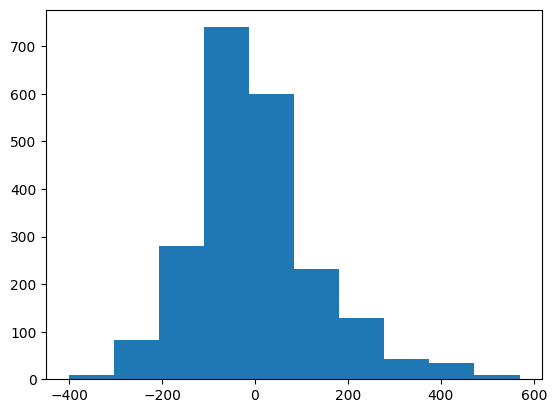

In [17]:
from matplotlib import pyplot as plt

plt.hist(model_df["constructor_ranking_points_before_race_relative"])
plt.show()


merged_df

In [18]:
# profile.to_file("output.html")

NameError: name 'profile' is not defined